<a href="https://colab.research.google.com/github/Abdurrasyiid/PDS1441/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA (Eksplorasi Data Analysis)**



In [0]:
#import libray yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt #Library untuk membuat info grafis secara visual menggunakan plot

In [0]:
#memasukkan file SampleData.csv

# [!] untuk google collab
data = pd.read_csv("SampleData.csv") 

# [!] jika menggunakan jupyter gunakan 
#data = pd.read_csv(r"PATH") 


In [4]:
#menampilkan data csv
data

,HouseID,Area,CityCenter,Owner,Nrooms,District,Color,Price
0,T20,99.41,961,M,3,D,G,817.21
1,T9,104.35,947,D,1,C,T,436.46
2,T8,146.18,923,M,1,A,G,683.77
3,T12,83.00,919,M,6,B,T,1246.79
4,T18,173.76,765,D,3,A,G,899.88
5,T13,123.68,741,D,1,A,T,581.17
6,T5,126.90,720,D,2,D,G,785.88
7,T10,193.24,716,D,3,D,G,1197.97
8,T19,192.86,612,M,4,C,T,942.04
9,T11,209.98,610,M,3,A,T,1274.70


In [5]:
#Analisis Statistika Basic
data.describe()

,Area,CityCenter,Nrooms,Price
count,20.000000,20.000000,20.000000,20.000000
mean,166.503500,576.350000,3.150000,1017.613500
std,51.574051,261.493338,1.631112,305.943594
min,68.000000,159.000000,1.000000,436.460000
25%,126.095000,371.000000,2.000000,840.032500
50%,186.090000,605.000000,3.000000,961.110000
75%,202.000000,747.000000,4.000000,1253.767500
max,230.030000,961.000000,6.000000,1627.420000


**Pertanyaan** : Dari data diatas kenapa HouseID, Owner,District dan Color tidak masuk ke deskripsi data statistika ?

**Jawab ** : Sebab data-data tersebut tidak bertipe float sehingga tidak dapat dilakukan kalkulasi statistik

**Solusi**     : Oleh sebab itu harus dilakukan cleansing pada data-data tersebut, contoh utk data Owner, Lakukan Cleansing pada data Owner

# **Cleansing Data**


In [9]:
#Langkah 1 : Melihat Data ke berapa saja yang Ownernya Move/Death
data["Owner"]=="M"

0      True
1     False
2      True
3      True
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11    False
12    False
13     True
14    False
15    False
16     True
17    False
18     True
19     True
Name: Owner, dtype: bool

In [10]:
data["Owner"]=="D"

0     False
1      True
2     False
3     False
4      True
5      True
6      True
7      True
8     False
9     False
10    False
11     True
12     True
13    False
14     True
15     True
16    False
17     True
18    False
19    False
Name: Owner, dtype: bool

In [11]:
#Langkah 2 : Tentukan Lokasi Data yang Ownernya Move/Death menggunakan variabel.loc
data.loc[data["Owner"]=="D","Owner"]

1     D
4     D
5     D
6     D
7     D
11    D
12    D
14    D
15    D
17    D
Name: Owner, dtype: object

In [0]:
#Langkah 3 : Inisialisasi isi data Owner menggunakan tipe data integer, misal untuk Move = 1 dan Death = 2
data.loc[data["Owner"]=="M","Owner"] = 1
data.loc[data["Owner"]=="D","Owner"] = 2

In [13]:
#Tampilan sifat data
data["Owner"].describe()

count     20
unique     2
top        2
freq      10
Name: Owner, dtype: int64

In [0]:
#Dari hasil deskripsi data Owner diatas datatype masih integer belum dapat dilakukan kalkulasi statistik sehingga untuk dapat dilakukan kalkulasi statistik diperlukan merubah data ke tipe data float 
data["Owner"] = data["Owner"].astype(float)

In [15]:
data["Owner"].describe()

count    20.000000
mean      1.500000
std       0.512989
min       1.000000
25%       1.000000
50%       1.500000
75%       2.000000
max       2.000000
Name: Owner, dtype: float64

In [16]:
#Data Owner sudah dapat dilakukan kalkulasi dasar statistika
#Untuk itu Tampilkan deskripsi seluruh data yang mampu

data.describe()

,Area,CityCenter,Owner,Nrooms,Price
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,166.503500,576.350000,1.500000,3.150000,1017.613500
std,51.574051,261.493338,0.512989,1.631112,305.943594
min,68.000000,159.000000,1.000000,1.000000,436.460000
25%,126.095000,371.000000,1.000000,2.000000,840.032500
50%,186.090000,605.000000,1.500000,3.000000,961.110000
75%,202.000000,747.000000,2.000000,4.000000,1253.767500
max,230.030000,961.000000,2.000000,6.000000,1627.420000


# Visualisasi Data menggunakan Plot

In [17]:
data

,HouseID,Area,CityCenter,Owner,Nrooms,District,Color,Price
0,T20,99.41,961,1.0,3,D,G,817.21
1,T9,104.35,947,2.0,1,C,T,436.46
2,T8,146.18,923,1.0,1,A,G,683.77
3,T12,83.00,919,1.0,6,B,T,1246.79
4,T18,173.76,765,2.0,3,A,G,899.88
5,T13,123.68,741,2.0,1,A,T,581.17
6,T5,126.90,720,2.0,2,D,G,785.88
7,T10,193.24,716,2.0,3,D,G,1197.97
8,T19,192.86,612,1.0,4,C,T,942.04
9,T11,209.98,610,1.0,3,A,T,1274.70


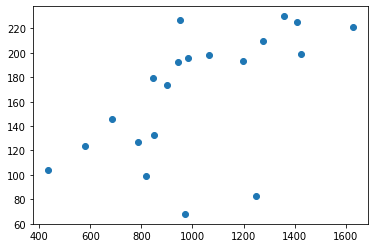

In [20]:
#Untuk menampilkan korelasi 2 dimensi antar data menggunakan Plot
#Korelasi antara data Price dengan Area 

plt.plot(data["Price"], data["Area"], "o")
plt.show()
